In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import math
import time

import tensorflow as tf

# Don't forget to select GPU runtime environment in Runtime -> Change runtime type
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

# we will use Sonnet on top of TF 
!pip install -q dm-sonnet
import sonnet as snt

import numpy as np
import os

# Plotting library.
from matplotlib import pyplot as plt
from skimage import color
import scipy
import sklearn.neighbors as nn
import pylab as pl
from IPython.display import clear_output, Image, display, HTML

from google.colab import files

Found GPU at: /device:GPU:0

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [3]:
#@title Bin centres in ab space; 313 bins, with (a, b) coordinates ; shape (313, 2)
bin_centres = np.asarray([[ -90,   50],
       [ -90,   60],
       [ -90,   70],
       [ -90,   80],
       [ -90,   90],
       [ -80,   20],
       [ -80,   30],
       [ -80,   40],
       [ -80,   50],
       [ -80,   60],
       [ -80,   70],
       [ -80,   80],
       [ -80,   90],
       [ -70,    0],
       [ -70,   10],
       [ -70,   20],
       [ -70,   30],
       [ -70,   40],
       [ -70,   50],
       [ -70,   60],
       [ -70,   70],
       [ -70,   80],
       [ -70,   90],
       [ -60,  -20],
       [ -60,  -10],
       [ -60,    0],
       [ -60,   10],
       [ -60,   20],
       [ -60,   30],
       [ -60,   40],
       [ -60,   50],
       [ -60,   60],
       [ -60,   70],
       [ -60,   80],
       [ -60,   90],
       [ -50,  -30],
       [ -50,  -20],
       [ -50,  -10],
       [ -50,    0],
       [ -50,   10],
       [ -50,   20],
       [ -50,   30],
       [ -50,   40],
       [ -50,   50],
       [ -50,   60],
       [ -50,   70],
       [ -50,   80],
       [ -50,   90],
       [ -50,  100],
       [ -40,  -40],
       [ -40,  -30],
       [ -40,  -20],
       [ -40,  -10],
       [ -40,    0],
       [ -40,   10],
       [ -40,   20],
       [ -40,   30],
       [ -40,   40],
       [ -40,   50],
       [ -40,   60],
       [ -40,   70],
       [ -40,   80],
       [ -40,   90],
       [ -40,  100],
       [ -30,  -50],
       [ -30,  -40],
       [ -30,  -30],
       [ -30,  -20],
       [ -30,  -10],
       [ -30,    0],
       [ -30,   10],
       [ -30,   20],
       [ -30,   30],
       [ -30,   40],
       [ -30,   50],
       [ -30,   60],
       [ -30,   70],
       [ -30,   80],
       [ -30,   90],
       [ -30,  100],
       [ -20,  -50],
       [ -20,  -40],
       [ -20,  -30],
       [ -20,  -20],
       [ -20,  -10],
       [ -20,    0],
       [ -20,   10],
       [ -20,   20],
       [ -20,   30],
       [ -20,   40],
       [ -20,   50],
       [ -20,   60],
       [ -20,   70],
       [ -20,   80],
       [ -20,   90],
       [ -20,  100],
       [ -10,  -60],
       [ -10,  -50],
       [ -10,  -40],
       [ -10,  -30],
       [ -10,  -20],
       [ -10,  -10],
       [ -10,    0],
       [ -10,   10],
       [ -10,   20],
       [ -10,   30],
       [ -10,   40],
       [ -10,   50],
       [ -10,   60],
       [ -10,   70],
       [ -10,   80],
       [ -10,   90],
       [ -10,  100],
       [   0,  -70],
       [   0,  -60],
       [   0,  -50],
       [   0,  -40],
       [   0,  -30],
       [   0,  -20],
       [   0,  -10],
       [   0,    0],
       [   0,   10],
       [   0,   20],
       [   0,   30],
       [   0,   40],
       [   0,   50],
       [   0,   60],
       [   0,   70],
       [   0,   80],
       [   0,   90],
       [   0,  100],
       [  10,  -80],
       [  10,  -70],
       [  10,  -60],
       [  10,  -50],
       [  10,  -40],
       [  10,  -30],
       [  10,  -20],
       [  10,  -10],
       [  10,    0],
       [  10,   10],
       [  10,   20],
       [  10,   30],
       [  10,   40],
       [  10,   50],
       [  10,   60],
       [  10,   70],
       [  10,   80],
       [  10,   90],
       [  20,  -80],
       [  20,  -70],
       [  20,  -60],
       [  20,  -50],
       [  20,  -40],
       [  20,  -30],
       [  20,  -20],
       [  20,  -10],
       [  20,    0],
       [  20,   10],
       [  20,   20],
       [  20,   30],
       [  20,   40],
       [  20,   50],
       [  20,   60],
       [  20,   70],
       [  20,   80],
       [  20,   90],
       [  30,  -90],
       [  30,  -80],
       [  30,  -70],
       [  30,  -60],
       [  30,  -50],
       [  30,  -40],
       [  30,  -30],
       [  30,  -20],
       [  30,  -10],
       [  30,    0],
       [  30,   10],
       [  30,   20],
       [  30,   30],
       [  30,   40],
       [  30,   50],
       [  30,   60],
       [  30,   70],
       [  30,   80],
       [  30,   90],
       [  40, -100],
       [  40,  -90],
       [  40,  -80],
       [  40,  -70],
       [  40,  -60],
       [  40,  -50],
       [  40,  -40],
       [  40,  -30],
       [  40,  -20],
       [  40,  -10],
       [  40,    0],
       [  40,   10],
       [  40,   20],
       [  40,   30],
       [  40,   40],
       [  40,   50],
       [  40,   60],
       [  40,   70],
       [  40,   80],
       [  40,   90],
       [  50, -100],
       [  50,  -90],
       [  50,  -80],
       [  50,  -70],
       [  50,  -60],
       [  50,  -50],
       [  50,  -40],
       [  50,  -30],
       [  50,  -20],
       [  50,  -10],
       [  50,    0],
       [  50,   10],
       [  50,   20],
       [  50,   30],
       [  50,   40],
       [  50,   50],
       [  50,   60],
       [  50,   70],
       [  50,   80],
       [  60, -110],
       [  60, -100],
       [  60,  -90],
       [  60,  -80],
       [  60,  -70],
       [  60,  -60],
       [  60,  -50],
       [  60,  -40],
       [  60,  -30],
       [  60,  -20],
       [  60,  -10],
       [  60,    0],
       [  60,   10],
       [  60,   20],
       [  60,   30],
       [  60,   40],
       [  60,   50],
       [  60,   60],
       [  60,   70],
       [  60,   80],
       [  70, -110],
       [  70, -100],
       [  70,  -90],
       [  70,  -80],
       [  70,  -70],
       [  70,  -60],
       [  70,  -50],
       [  70,  -40],
       [  70,  -30],
       [  70,  -20],
       [  70,  -10],
       [  70,    0],
       [  70,   10],
       [  70,   20],
       [  70,   30],
       [  70,   40],
       [  70,   50],
       [  70,   60],
       [  70,   70],
       [  70,   80],
       [  80, -110],
       [  80, -100],
       [  80,  -90],
       [  80,  -80],
       [  80,  -70],
       [  80,  -60],
       [  80,  -50],
       [  80,  -40],
       [  80,  -30],
       [  80,  -20],
       [  80,  -10],
       [  80,    0],
       [  80,   10],
       [  80,   20],
       [  80,   30],
       [  80,   40],
       [  80,   50],
       [  80,   60],
       [  80,   70],
       [  90, -110],
       [  90, -100],
       [  90,  -90],
       [  90,  -80],
       [  90,  -70],
       [  90,  -60],
       [  90,  -50],
       [  90,  -40],
       [  90,  -30],
       [  90,  -20],
       [  90,  -10],
       [  90,    0],
       [  90,   10],
       [  90,   20],
       [  90,   30],
       [  90,   40],
       [  90,   50],
       [  90,   60],
       [  90,   70],
       [ 100,  -90],
       [ 100,  -80],
       [ 100,  -70],
       [ 100,  -60],
       [ 100,  -50],
       [ 100,  -40],
       [ 100,  -30],
       [ 100,  -20],
       [ 100,  -10],
       [ 100,    0]])
print (bin_centres.shape)

(313, 2)


In [0]:
K = bin_centres.shape[0]
num_outputs = K

In [5]:
#@title Weights to boost rare colours; shape (313,)
prior_weights = np.asarray([  4.88637077e-08,   1.38517899e-07,   5.76575330e-07,
         2.63933821e-06,   9.50312428e-07,   3.56691466e-08,
         2.53701218e-07,   7.52531286e-07,   1.96176670e-06,
         3.01480592e-06,   4.88644584e-06,   5.64053403e-06,
         1.29429273e-06,   9.36679821e-08,   6.35391447e-07,
         2.24641415e-06,   5.25553580e-06,   8.76607414e-06,
         1.34091655e-05,   1.82779229e-05,   1.60724964e-05,
         7.22202335e-06,   1.19142890e-06,   4.18887782e-07,
         1.88786671e-06,   5.56257122e-06,   1.39430890e-05,
         2.40792026e-05,   3.47403683e-05,   4.82280696e-05,
         6.84466539e-05,   7.22763768e-05,   4.29625157e-05,
         1.64851003e-05,   3.02568434e-06,   7.73805166e-07,
         1.64461151e-05,   4.38741086e-05,   5.87340628e-05,
         8.72316315e-05,   1.18770632e-04,   1.67088961e-04,
         2.63252494e-04,   3.38518453e-04,   2.60347030e-04,
         1.26975045e-04,   4.08961754e-05,   7.22817564e-06,
         1.99693873e-07,   8.92095222e-07,   2.17681063e-05,
         1.12513049e-04,   2.16379538e-04,   2.66030577e-04,
         3.32276125e-04,   5.05886131e-04,   9.30736644e-04,
         1.37460574e-03,   1.22399826e-03,   6.84941967e-04,
         2.66331750e-04,   7.81269159e-05,   1.51248334e-05,
         6.91909015e-07,   7.84442407e-07,   2.60442924e-05,
         1.73225904e-04,   4.26183231e-04,   6.94351438e-04,
         9.10106607e-04,   1.36396435e-03,   2.65613957e-03,
         4.28549468e-03,   4.12207952e-03,   2.46151934e-03,
         1.05696835e-03,   3.65279981e-04,   1.16697960e-04,
         3.93379465e-05,   5.51556883e-06,   2.31736474e-05,
         2.18864360e-04,   7.00249522e-04,   1.39982571e-03,
         2.46769627e-03,   4.12544004e-03,   6.65952684e-03,
         9.48145351e-03,   9.47151961e-03,   6.01423441e-03,
         2.73632660e-03,   1.05931639e-03,   4.24813148e-04,
         2.06608970e-04,   1.12516660e-04,   1.82343798e-05,
         1.29806207e-05,   1.98459648e-04,   1.02348520e-03,
         3.02121005e-03,   6.83473237e-03,   1.91548207e-02,
         4.91089070e-02,   3.73436164e-02,   2.15410263e-02,
         1.19576249e-02,   5.37496020e-03,   2.22045083e-03,
         1.00228369e-03,   5.34522164e-04,   2.98875772e-04,
         1.13312553e-04,   7.14431138e-06,   5.09891097e-06,
         1.17016968e-04,   7.91608776e-04,   2.85160331e-03,
         6.63106003e-03,   1.52823814e-02,   6.42029222e-02,
         2.01234011e-01,   1.08298509e-01,   4.15076383e-02,
         1.65514759e-02,   6.17025338e-03,   2.49037787e-03,
         1.17210899e-03,   6.26213708e-04,   3.19615929e-04,
         7.25174444e-05,   1.56894049e-06,   1.36853721e-06,
         4.80932224e-05,   3.54808240e-04,   1.19859673e-03,
         2.42655886e-03,   3.77852526e-03,   6.61168484e-03,
         1.95601464e-02,   5.31084300e-02,   4.83594842e-02,
         3.27312450e-02,   1.76505654e-02,   7.57483162e-03,
         3.07662489e-03,   1.31642943e-03,   6.08919745e-04,
         2.51085095e-04,   2.98835289e-05,   1.62990511e-05,
         1.50673550e-04,   4.48743165e-04,   8.11259090e-04,
         1.02889008e-03,   1.07089813e-03,   1.19569058e-03,
         2.19157211e-03,   5.41470406e-03,   1.05136718e-02,
         1.22407698e-02,   9.83720010e-03,   5.75596418e-03,
         2.78841071e-03,   1.22907076e-03,   5.18767129e-04,
         1.60173838e-04,   8.73308520e-06,   3.67741205e-06,
         6.01862290e-05,   1.95014172e-04,   3.29027511e-04,
         3.92108962e-04,   3.36467202e-04,   2.87580737e-04,
         3.55864982e-04,   6.00025038e-04,   1.30302957e-03,
         2.94264848e-03,   4.35510075e-03,   4.23253106e-03,
         3.10584698e-03,   1.85082460e-03,   9.27590744e-04,
         3.96521780e-04,   8.90297299e-05,   2.16968519e-06,
         5.71286175e-07,   2.03625835e-05,   9.38233966e-05,
         1.53400572e-04,   1.73289582e-04,   1.39873962e-04,
         1.05413549e-04,   1.24053600e-04,   1.68733854e-04,
         2.72700806e-04,   4.94871924e-04,   9.93266911e-04,
         1.84474766e-03,   2.31814111e-03,   1.80826094e-03,
         1.15884412e-03,   6.29566586e-04,   2.67367592e-04,
         3.98110075e-05,   4.21985639e-07,   4.98443370e-06,
         4.41126865e-05,   8.27534031e-05,   7.93993301e-05,
         5.43451073e-05,   4.12448289e-05,   4.86518392e-05,
         6.68120367e-05,   9.23086078e-05,   1.48979560e-04,
         2.44392940e-04,   4.32722144e-04,   8.18053937e-04,
         1.39190683e-03,   1.54712315e-03,   9.45958739e-04,
         4.47192968e-04,   1.68976619e-04,   1.54429623e-05,
         8.54773467e-07,   1.67927601e-05,   4.30846659e-05,
         3.90191681e-05,   2.08583312e-05,   1.52734877e-05,
         1.76861134e-05,   2.59901753e-05,   3.63725347e-05,
         5.40605908e-05,   8.49764276e-05,   1.25964535e-04,
         1.94377266e-04,   3.54922552e-04,   6.60036129e-04,
         1.02443401e-03,   9.73277882e-04,   4.20818025e-04,
         1.09543742e-04,   5.62733417e-06,   5.84478616e-06,
         2.46368486e-05,   1.78842817e-05,   7.63802784e-06,
         5.27525552e-06,   5.87004194e-06,   9.44847952e-06,
         1.41464633e-05,   1.89742307e-05,   2.83317550e-05,
         4.17858199e-05,   5.53431612e-05,   7.32897293e-05,
         1.17445560e-04,   2.17510161e-04,   3.73459793e-04,
         5.23290004e-04,   3.94743063e-04,   9.10961481e-05,
         2.36171766e-06,   7.43685027e-06,   9.79349898e-06,
         3.56092646e-06,   2.23531626e-06,   2.22702456e-06,
         2.89101214e-06,   5.42782588e-06,   6.57866549e-06,
         8.08947713e-06,   1.07832731e-05,   1.43150989e-05,
         1.61773707e-05,   1.76172387e-05,   2.22420318e-05,
         3.43043821e-05,   5.67338499e-05,   9.24106902e-05,
         1.34054343e-04,   5.91858296e-05,   3.78755066e-07,
         4.58242862e-07,   4.81465701e-07,   6.92722895e-07,
         1.01984763e-06,   2.34830496e-06,   2.92547680e-06,
         2.83353631e-06,   2.48962571e-06,   2.08168930e-06,
         2.12280955e-06,   1.66435596e-06,   1.28913095e-06,
         1.11413320e-06,   1.22927291e-06,   1.59697061e-06,
         2.46489627e-06,   5.07245642e-06,   3.65973502e-06,
         6.07144475e-09,   3.65559565e-08,   2.90157510e-07,
         1.40430462e-06,   6.00511564e-07,   2.64900940e-07,
         1.20902155e-07,   4.78526910e-08,   2.88152932e-08,
         1.45039504e-08])
print (prior_weights.shape)

(313,)


In [0]:
dataset_name = 'tiny_imagenet'  #@param
image_size = 64  #@param
batch_size = 12  #@param


In [0]:
#@title Preprocess data (RGB -> Lab -> classification embedding and back)
def flatten_nd_array(pts_nd, axis=1):
  ''' Flatten an nd array into a 2d array with a certain axis
  INPUTS
      pts_nd       N0xN1x...xNd array
      axis         integer
  OUTPUTS
      pts_flt     prod(N \ N_axis) x N_axis array     '''
  NDIM = pts_nd.ndim
  SHP = np.array(pts_nd.shape)
  nax = np.setdiff1d(np.arange(0, NDIM), np.array((axis))) # non axis indices
  NPTS = np.prod(SHP[nax])
  axorder = np.concatenate((nax, np.array(axis).flatten()), axis=0)
  pts_flt = pts_nd.transpose((axorder))
  pts_flt = pts_flt.reshape(NPTS, SHP[axis])
  return pts_flt


def unflatten_2d_array(pts_flt, pts_nd, axis=1, squeeze=False):
  ''' Unflatten a 2d array with a certain axis
  INPUTS
      pts_flt     prod(N \ N_axis) x M array
      pts_nd      N0xN1x...xNd array
      axis        integer
      squeeze     bool     if true, M=1, squeeze it out
  OUTPUTS
      pts_out     N0xN1x...xNd array        '''
  NDIM = pts_nd.ndim
  SHP = np.array(pts_nd.shape)
  nax = np.setdiff1d(np.arange(0, NDIM), np.array((axis))) # non axis indices
  NPTS = np.prod(SHP[nax])

  if(squeeze):
    axorder = nax
    axorder_rev = np.argsort(axorder)
    M = pts_flt.shape[1]
    NEW_SHP = SHP[nax].tolist()
    pts_out = pts_flt.reshape(NEW_SHP)
    pts_out = pts_out.transpose(axorder_rev)
  else:
    axorder = np.concatenate((nax, np.array(axis).flatten()),axis=0)
    axorder_rev = np.argsort(axorder)
    M = pts_flt.shape[1]
    NEW_SHP = SHP[nax].tolist()
    NEW_SHP.append(M)
    pts_out = pts_flt.reshape(NEW_SHP)
    pts_out = pts_out.transpose(axorder_rev)

  return pts_out


def na(): # shorthand for new axis
  return np.newaxis


def prior_boost(data_ab_quant, axis=1):
  alpha = 1.
  gamma = .5

  # empirical prior probability
  prior_probs = prior_weights

  # define uniform probability
  uni_probs = np.zeros_like(prior_probs)
  uni_probs[prior_probs != 0] = 1.
  uni_probs = uni_probs / np.sum(uni_probs)

  # convex combination of empirical prior and uniform distribution       
  prior_mix = (1 - gamma) * prior_probs + gamma * uni_probs

  # set prior factor
  prior_factor = prior_mix**-alpha
  prior_factor = prior_factor / np.sum(prior_probs * prior_factor) # re-normalize

  # implied empirical prior
  implied_prior = prior_probs * prior_factor
  implied_prior = implied_prior / np.sum(implied_prior) # re-normalize
  
  data_ab_maxind = np.argmax(data_ab_quant, axis=axis)
  corr_factor = prior_factor[data_ab_maxind]
  if(axis==0):
    return corr_factor[na(),:]
  elif(axis==1):
    return corr_factor[:,na(),:]
  elif(axis==2):
    return corr_factor[:,:,na(),:]
  elif(axis==3):
    return corr_factor[:,:,:,na()]


def py_preprocess_images_labels(rgb_images, axis=1):
  """Convert rgb images to Lab and encode ab in bin-space with boosting."""
  num_nearest_neighbours = int(10)
  sigma = 5.
  nbrs = nn.NearestNeighbors(n_neighbors=num_nearest_neighbours, algorithm='ball_tree').fit(bin_centres)
  lab_images = color.rgb2lab(rgb_images)
  L = lab_images[:, :, :, 0]
  L -= 50. # centre the data
  ab_pts = lab_images[:, :, :, 1:]
  thresh = 5.
  nongray_mask = (np.sum(np.sum(np.sum(np.abs(ab_pts) > thresh, axis=1), axis=1), axis=1) > 0)[:, na(), na()]
  ab_pts = np.transpose(ab_pts, [0, 3, 1, 2])
  pts_flt = flatten_nd_array(ab_pts, axis=axis)
  P = pts_flt.shape[0]
  pts_enc_flt = np.zeros((P, K))
  p_inds = np.arange(0, P, dtype='int')[:,na()]

  P = pts_flt.shape[0]
  (dists, inds) = nbrs.kneighbors(pts_flt)

  wts = np.exp(-dists**2 / (2 * sigma**2))
  wts = wts / np.sum(wts, axis=1)[:, na()]

  pts_enc_flt[p_inds, inds] = wts
  pts_enc = unflatten_2d_array(pts_enc_flt, ab_pts, axis=axis)
  del pts_enc_flt
  boost_pts_enc = prior_boost(pts_enc)
  pts_enc = np.transpose(pts_enc, [0, 2, 3, 1])
  boost_pts_enc = np.transpose(boost_pts_enc, [0, 2, 3, 1])
  boost_pts_enc = np.squeeze(boost_pts_enc, axis=-1)
  prior_boost_nongray = boost_pts_enc * nongray_mask
  L = np.expand_dims(L, axis=-1)
  return L, pts_enc, prior_boost_nongray 


def embedding2RGB(L, pts_enc_nd, rebalance=1., axis=1):
  L += 50.
  def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.expand_dims(np.max(x, axis=-1), axis=-1))
    return e_x / np.expand_dims(e_x.sum(axis=-1), axis=-1)
  
  pts_enc_nd *= rebalance
  pts_enc_nd = softmax(pts_enc_nd)
  pts_enc_nd = np.transpose(pts_enc_nd, [0, 3, 1, 2])
  
  pts_enc_flt = flatten_nd_array(pts_enc_nd, axis=axis)
  pts_dec_flt = np.dot(pts_enc_flt, bin_centres)
  pts_dec_nd = unflatten_2d_array(pts_dec_flt, pts_enc_nd, axis=axis)
  pts_dec_nd = np.transpose(pts_dec_nd, [0, 2, 3, 1])
    
  batch_size = L.shape[0]
  im_RGB = []
  for i in range(batch_size):
    pts_dec_nd1 = pts_dec_nd[i, :, :, 0]
    pts_dec_nd1 = pts_dec_nd1.repeat(2, axis=0).repeat(2, axis=1)  
    pts_dec_nd1 = np.expand_dims(pts_dec_nd1, axis=-1)
    pts_dec_nd2 = pts_dec_nd[i, :, :, 1]
    pts_dec_nd2 = pts_dec_nd2.repeat(2, axis=0).repeat(2, axis=1) 
    pts_dec_nd2 = np.expand_dims(pts_dec_nd2, axis=-1)
    pts_Lab = np.concatenate([L[i], pts_dec_nd1, pts_dec_nd2], axis=-1) 
    im_RGB.append((255*np.clip(color.lab2rgb(pts_Lab), 0, 1)).astype('uint8'))
  im_RGB = np.stack(im_RGB, axis=0)
  return im_RGB

In [0]:
# Reset graph
tf.reset_default_graph()

In [0]:
#@title Prepare the data loaders for training and validation
def tiny_imagenet_parser(value, image_size, is_training):
  """Parses tiny imagenet example.

  Args:
    value: encoded example.
    image_size: size of the image.
    is_training: if True then do training preprocessing (which includes
      random cropping), otherwise do eval preprocessing.

  Returns:
    image: tensor with the image.
    label: true label of the image.
  """
  keys_to_features = {
      'image/encoded': tf.FixedLenFeature((), tf.string, ''),
      'label/tiny_imagenet': tf.FixedLenFeature([], tf.int64, -1),
  }

  parsed = tf.parse_single_example(value, keys_to_features)

  image_buffer = tf.reshape(parsed['image/encoded'], shape=[])
  image = tf.image.decode_image(image_buffer, channels=3)
  image = tf.image.convert_image_dtype(
      image, dtype=tf.float32)

  # Crop image
  if is_training:
    bbox_begin, bbox_size, _ = tf.image.sample_distorted_bounding_box(
        tf.shape(image),
        bounding_boxes=tf.constant([0.0, 0.0, 1.0, 1.0],
                                   dtype=tf.float32,
                                   shape=[1, 1, 4]),
        min_object_covered=0.5,
        aspect_ratio_range=[0.75, 1.33],
        area_range=[0.5, 1.0],
        max_attempts=20,
        use_image_if_no_bounding_boxes=True)
    image = tf.slice(image, bbox_begin, bbox_size)

  # resize image
  image = tf.image.resize_bicubic([image], [image_size, image_size])[0]

  # Rescale image to [-1, 1] range.
  image = tf.multiply(tf.subtract(image, 0.5), 2.0)

  image = tf.reshape(image, [image_size, image_size, 3])

  # Labels are in [0, 199] range
  label = tf.cast(
      tf.reshape(parsed['label/tiny_imagenet'], shape=[]), dtype=tf.int32)

  return image, label


def tiny_imagenet_input(split, batch_size, image_size, is_training, tiny_imagenet_data_dir=''):
  """Returns Tiny Imagenet Dataset.

  Args:
    split: name of the split, "train" or "validation".
    batch_size: size of the minibatch.
    image_size: size of the one side of the image. Output images will be
      resized to square shape image_size*image_size.
    is_training: if True then training preprocessing is done, otherwise eval
      preprocessing is done.instance of tf.data.Dataset with the dataset.

  Raises:
    ValueError: if name of the split is incorrect.

  Returns:
    Instance of tf.data.Dataset with the dataset.
  """
  if split.lower().startswith('train'):
    filepath = os.path.join(tiny_imagenet_data_dir, 'train.tfrecord')
  elif split.lower().startswith('validation'):
    filepath = os.path.join(tiny_imagenet_data_dir, 'validation.tfrecord')
  else:
    raise ValueError('Invalid split: %s' % split)

  dataset = tf.data.TFRecordDataset(filepath, buffer_size=8*1024*1024)

  if is_training:
    dataset = dataset.shuffle(10000)
    dataset = dataset.repeat()

  dataset = dataset.apply(
      tf.contrib.data.map_and_batch(
          lambda value: tiny_imagenet_parser(value, image_size, is_training),
          batch_size=batch_size,
          num_parallel_batches=4,
          drop_remainder=True))

  def set_shapes(images, labels):
    """Statically set the batch_size dimension."""
    images.set_shape(images.get_shape().merge_with(
        tf.TensorShape([batch_size, None, None, None])))
    labels.set_shape(labels.get_shape().merge_with(
        tf.TensorShape([batch_size])))
    return images, labels

  # Assign static batch size dimension
  dataset = dataset.map(set_shapes)

  dataset = dataset.prefetch(tf.contrib.data.AUTOTUNE)

  return dataset


def num_examples_per_epoch(split):
  """Returns the number of examples in the data set.

  Args:
    split: name of the split, "train" or "validation".

  Raises:
    ValueError: if split name is incorrect.

  Returns:
    Number of example in the split.
  """
  if split.lower().startswith('train'):
    return 100000
  elif split.lower().startswith('validation'):
    return 10000
  else:
    raise ValueError('Invalid split: %s' % split)


def get_dataset(dataset_name, split, batch_size, image_size, is_training, tiny_imagenet_data_dir):
  """Returns dataset.

  Args:
    dataset_name: name of the dataset, only "tiny_imagenet" available here.
    split: name of the split, "train" or "validation".
    batch_size: size of the minibatch.
    image_size: size of the one side of the image. Output images will be
      resized to square shape image_size*image_size.
    is_training: if True then training preprocessing is done, otherwise eval
      preprocessing is done.

  Raises:
    ValueError: if dataset_name is invalid.

  Returns:
    dataset: instance of tf.data.Dataset with the dataset.
    num_examples: number of examples in given split of the dataset.
    num_classes: number of classes in the dataset.
    bounds: tuple with bounds of image values. All returned image pixels
      are between bounds[0] and bounds[1].
  """
  if dataset_name == 'tiny_imagenet':
    dataset = tiny_imagenet_input(split, batch_size, image_size, is_training, tiny_imagenet_data_dir)
    num_examples = num_examples_per_epoch(split)
    num_classes = 200
    bounds = (-1, 1)
  else:
    raise ValueError('Invalid dataset %s' % dataset_name)
  return dataset, num_examples, num_classes, bounds

In [0]:
tiny_imagenet_data_dir = '/content/drive/My Drive/TMLW2019/TinyImagenet200/' #@param
# content/drive/My Drive/TMLW2019/TinyImagenet200/train.tfrecord

In [11]:
dataset_train, examples_per_epoch_train, num_classes, bounds = get_dataset(
  dataset_name, 'train', batch_size, image_size, True, tiny_imagenet_data_dir)
dataset_train_iterator = dataset_train.make_one_shot_iterator()
images_train, labels_train = dataset_train_iterator.get_next()
# make sure images are in [-1, 1]
images_train = tf.clip_by_value(images_train, -1., 1.)
# normalise to [0, 1]
images_train = (images_train + 1.0)/2.0

dataset_valid, examples_per_epoch_valid, _, _ = get_dataset(dataset_name,
  'validation', batch_size, image_size, False, tiny_imagenet_data_dir)
dataset_valid_iterator = dataset_valid.make_one_shot_iterator()
images_valid, labels_valid = dataset_valid_iterator.get_next()
images_valid = tf.clip_by_value(images_valid, -1., 1.)
images_valid = (images_valid + 1.0)/2.0

Instructions for updating:
Use `tf.data.experimental.map_and_batch(...)`.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
`seed2` arg is deprecated.Use sample_distorted_bounding_box_v2 instead.
Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.


In [12]:
# Check sizes of tensors
print ('Tensor training images')
print (images_train)
print ('Tensor training labels')
print (labels_train)
print ('Tensor validation images')
print (images_valid)
print ('Tensor validation labels')
print (labels_valid)

Tensor training images
Tensor("truediv:0", shape=(12, 64, 64, 3), dtype=float32)
Tensor training labels
Tensor("IteratorGetNext:1", shape=(12,), dtype=int32)
Tensor validation images
Tensor("truediv_1:0", shape=(12, 64, 64, 3), dtype=float32)
Tensor validation labels
Tensor("IteratorGetNext_1:1", shape=(12,), dtype=int32)


In [0]:
#@title Display images
MAX_IMAGES = 10
def gallery(images, label, title='Input images'):  
  class_dict = [
    u'Egyptian cat',
    u'reel',
    u'volleyball',
    u'rocking chair',
    u'lemon',
    u'bullfrog',
    u'basketball',
    u'cliff',
    u'espresso',
    u'plunger',
    u'parking meter',
    u'German shepherd',
    u'dining table',
    u'monarch',
    u'brown bear',
    u'school bus',
    u'pizza',
    u'guinea pig',
    u'umbrella',
    u'organ',
    u'oboe',
    u'maypole',
    u'goldfish',
    u'potpie',
    u'hourglass',
    u'seashore',
    u'computer keyboard',
    u'Arabian camel',
    u'ice cream',
    u'nail',
    u'space heater',
    u'cardigan',
    u'baboon',
    u'snail',
    u'coral reef',
    u'albatross',
    u'spider web',
    u'sea cucumber',
    u'backpack',
    u'Labrador',
    u'pretzel',
    u'king penguin',
    u'sulphur butterfly',
    u'tarantula',
    u'lesser panda',
    u'pop bottle',
    u'banana',
    u'sock',
    u'cockroach',
    u'projectile',
    u'beer',
    u'mantis',
    u'freight car',
    u'guacamole',
    u'remote control',
    u'European fire salamander',
    u'lakeside',
    u'chimpanzee',
    u'pay-phone',
    u'fur coat',
    u'alp',
    u'lampshade',
    u'torch',
    u'abacus',
    u'moving van',
    u'barrel',
    u'tabby cat',
    u'goose',
    u'koala',
    u'bullet train',
    u'CD player',
    u'teapot',
    u'birdhouse',
    u'gazelle',
    u'academic gown',
    u'tractor',
    u'ladybug',
    u'miniskirt',
    u'golden retriever',
    u'triumphal arch',
    u'cannon',
    u'neck brace',
    u'sombrero',
    u'gasmask',
    u'candle',
    u'desk',
    u'frying pan',
    u'bee',
    u'dam',
    u'spiny lobster',
    u'police van',
    u'iPod',
    u'punching bag',
    u'beacon',
    u'jellyfish',
    u'wok',
    u'potter wheel',
    u'sandal',
    u'pill bottle',
    u'butcher shop',
    u'slug',
    u'hog',
    u'cougar',
    u'crane',
    u'vestment',
    u'dragonfly',
    u'cash machine',
    u'mushroom',
    u'jinrikisha',
    u'water tower',
    u'chest',
    u'snorkel',
    u'sunglasses',
    u'fly',
    u'limousine',
    u'black stork',
    u'dugong',
    u'sports car',
    u'water jug',
    u'suspension bridge',
    u'ox',
    u'ice lolly',
    u'turnstile',
    u'Christmas stocking',
    u'broom',
    u'scorpion',
    u'wooden spoon',
    u'picket fence',
    u'rugby ball',
    u'sewing machine',
    u'steel arch bridge',
    u'Persian cat',
    u'refrigerator',
    u'barn',
    u'apron',
    u'Yorkshire terrier',
    u'swimming trunks',
    u'stopwatch',
    u'lawn mower',
    u'thatch',
    u'fountain',
    u'black widow',
    u'bikini',
    u'plate',
    u'teddy bear',
    u'barbershop',
    u'confectionery',
    u'beach wagon',
    u'scoreboard',
    u'orange',
    u'flagpole',
    u'American lobster',
    u'trolleybus',
    u'drumstick',
    u'dumbbell',
    u'brass',
    u'bow tie',
    u'convertible',
    u'bighorn',
    u'orangutan',
    u'American alligator',
    u'centipede',
    u'syringe',
    u'go-kart',
    u'brain coral',
    u'sea slug',
    u'cliff dwelling',
    u'mashed potato',
    u'viaduct',
    u'military uniform',
    u'pomegranate',
    u'chain',
    u'kimono',
    u'comic book',
    u'trilobite',
    u'bison',
    u'pole',
    u'boa constrictor',
    u'poncho',
    u'bathtub',
    u'grasshopper',
    u'walking stick',
    u'Chihuahua',
    u'tailed frog',
    u'lion',
    u'altar',
    u'obelisk',
    u'beaker',
    u'bell pepper',
    u'bannister',
    u'bucket',
    u'magnetic compass',
    u'meat loaf',
    u'gondola',
    u'standard poodle',
    u'acorn',
    u'lifeboat',
    u'binoculars',
    u'cauliflower',
    u'African elephant']
  batch_size, h, w, num_channels = images.shape
  batch_size = min(batch_size, MAX_IMAGES)
  ff, axes = plt.subplots(1, batch_size,
                          figsize=(2*batch_size, 1),
                          subplot_kw={'xticks': [], 'yticks': []})
  for i in range(0, batch_size):
    if num_channels == 3:
      # axes[i].imshow(np.squeeze((images[i]+1.0)/2.0))
      axes[i].imshow(np.squeeze(images[i]))
    else:
      axes[i].imshow(np.squeeze(images[i]), cmap='gray')
    axes[i].set_title(class_dict[label[i]])
    plt.setp(axes[i].get_xticklabels(), visible=False)
    plt.setp(axes[i].get_yticklabels(), visible=False)
  ff.subplots_adjust(wspace=1.)
  plt.show()

## Model configuration
- architecture based on VGG16
- groups of Conv2D + ReLU, followed by BatchNorm
- num_channels, strides, and rates: 
      * block1 [64, 1, 1] [64, 2, 1] BatchNorm
      * block2 [128, 1, 1] [128, 1, 1] BatchNorm
      * block3 [256, 1, 1] [256, 1, 1] [256, 2, 1] BatchNorm
      * block4 [512, 1, 1] [512, 1, 1] [512, 1, 1] BatchNorm
      * block5 [512, 1, 2] [512, 1, 2] [512, 1, 2] BatchNorm
      * block6 [512, 1, 2] [512, 1, 2] [512, 1, 2] BatchNorm
      * block7 [512, 1, 1] [512, 1, 1] [512, 1, 1] BatchNorm
      * block8 deconv, conv, conv
      * conv_out
      
- all kernel shapes: 3x3, except last conv_out (1x1) and deconv (4x4)
- padding: SAME
- Each convolutional layer is followed by ReLU
- The last convolutional layer has num_channels = 313 (number of bins in ab space)

In [0]:
# define the model
class VGG(snt.AbstractModule):
  def __init__(self, name="vgg"):
    super(VGG, self).__init__(name=name)

  def _build(self, inputs, is_training=None, test_local_stats=False):
    net = inputs
    # block1
    conv_num = 1
    net = snt.Conv2D(64, 3, stride=1, name='conv' + str(conv_num))(net)
    net = tf.nn.relu(net)
  
    conv_num += 1
    net = snt.Conv2D(64, 3, stride=2, name='conv' + str(conv_num))(net)
    net = tf.nn.relu(net)
    
    net = snt.BatchNorm(name='bn1')(net, is_training=is_training, test_local_stats=test_local_stats)

    # block2
    conv_num += 1
    net = snt.Conv2D(128, 3, stride=1, name='conv' + str(conv_num))(net)
    net = tf.nn.relu(net)
    
    conv_num += 1
    net = snt.Conv2D(128, 3, stride=1, name='conv' + str(conv_num))(net)
    net = tf.nn.relu(net)
    
    net = snt.BatchNorm(name='bn2')(net, is_training=is_training, test_local_stats=test_local_stats)

    # block3
    conv_num += 1
    net = snt.Conv2D(256, 3, stride=1, name='conv' + str(conv_num))(net)
    net = tf.nn.relu(net)
    
    conv_num += 1
    net = snt.Conv2D(256, 3, stride=1, name='conv' + str(conv_num))(net)
    net = tf.nn.relu(net)
    
    conv_num += 1
    net = snt.Conv2D(256, 3, stride=2, name='conv' + str(conv_num))(net)
    net = tf.nn.relu(net)
    
    net = snt.BatchNorm(name='bn3')(net, is_training=is_training, test_local_stats=test_local_stats)
    
    # block4
    conv_num += 1
    net = snt.Conv2D(512, 3, stride=1, name='conv' + str(conv_num))(net)
    net = tf.nn.relu(net)
    
    conv_num += 1
    net = snt.Conv2D(512, 3, stride=1, name='conv' + str(conv_num))(net)
    net = tf.nn.relu(net)
    
    conv_num += 1
    net = snt.Conv2D(512, 3, stride=1, name='conv' + str(conv_num))(net)
    net = tf.nn.relu(net)
    
    net = snt.BatchNorm(name='bn4')(net, is_training=is_training, test_local_stats=test_local_stats)

    # block5
    conv_num += 1
    net = snt.Conv2D(512, 3, stride=1, rate=2, name='conv' + str(conv_num))(net)
    net = tf.nn.relu(net)
    
    conv_num += 1
    net = snt.Conv2D(512, 3, stride=1, rate=2, name='conv' + str(conv_num))(net)
    net = tf.nn.relu(net)
    
    conv_num += 1
    net = snt.Conv2D(512, 3, stride=1, rate=2, name='conv' + str(conv_num))(net)
    net = tf.nn.relu(net)
    
    net = snt.BatchNorm(name='bn5')(net, is_training=is_training, test_local_stats=test_local_stats)

    # block6
    conv_num += 1
    net = snt.Conv2D(512, 3, stride=1, rate=2, name='conv' + str(conv_num))(net)
    net = tf.nn.relu(net)
    
    conv_num += 1
    net = snt.Conv2D(512, 3, stride=1, rate=2, name='conv' + str(conv_num))(net)
    net = tf.nn.relu(net)
    
    conv_num += 1
    net = snt.Conv2D(512, 3, stride=1, rate=2, name='conv' + str(conv_num))(net)
    net = tf.nn.relu(net)
    
    net = snt.BatchNorm(name='bn6')(net, is_training=is_training, test_local_stats=test_local_stats)
    
    # block7
    conv_num += 1
    net = snt.Conv2D(512, 3, stride=1, name='conv' + str(conv_num))(net)
    net = tf.nn.relu(net)
    
    conv_num += 1
    net = snt.Conv2D(512, 3, stride=1, name='conv' + str(conv_num))(net)
    net = tf.nn.relu(net)
    
    conv_num += 1
    net = snt.Conv2D(512, 3, stride=1, name='conv' + str(conv_num))(net)
    net = tf.nn.relu(net)
    
    net = snt.BatchNorm(name='bn7')(net, is_training=is_training, test_local_stats=test_local_stats)

    # block8
    conv_num += 1
    net = snt.Conv2DTranspose(256, kernel_shape=4, stride=2, name='conv' + str(conv_num))(net)
    net = tf.nn.relu(net)

    conv_num += 1    
    net = snt.Conv2D(256, 3, stride=1, name='conv' + str(conv_num))(net)
    net = tf.nn.relu(net)

    conv_num += 1
    net = snt.Conv2D(256, 3, stride=1, name='conv' + str(conv_num))(net)
    net = tf.nn.relu(net)

    # Unary prediction
    conv_num += 1
    net = snt.Conv2D(313, 1, stride=1, name='conv' + str(conv_num))(net)

    return net

In [0]:
def get_num_params(scope):
  total_parameters = 0
  for variable in tf.trainable_variables(scope):
    # shape is an array of tf.Dimension
    shape = variable.get_shape()
    variable_parameters = 1
    for dim in shape:
      variable_parameters *= dim.value
    total_parameters += variable_parameters
  return total_parameters

In [0]:
with tf.variable_scope('model'):
  vgg_model = VGG()

In [0]:
# use py_func to convert images to Lab space and to embedding space
preprocessed_train_batch = tf.py_function(py_preprocess_images_labels, [images_train], [tf.float32, tf.float32, tf.float32])

# retrieve lightness L channel
train_inputs = preprocessed_train_batch[0]
train_inputs.set_shape([batch_size, image_size, image_size, 1])

# output will be twice smaller, so downsample lightness to concatenate with predicted ab channels
ds_train_inputs = tf.image.resize_nearest_neighbor(train_inputs, [int(image_size/2), int(image_size/2)])

# retrieve ground truth (embedded ab channels)
train_labels = preprocessed_train_batch[1]
train_labels.set_shape([batch_size, image_size, image_size, num_outputs])

# retrieve weights to boost pixels depending on colour rarity
weights_train = preprocessed_train_batch[2]
weights_train.set_shape([batch_size, image_size, image_size])

In [18]:
# get predictions from the model during training; is_training=True
train_predictions = vgg_model(train_inputs, is_training=True)
print (train_predictions)

Tensor("vgg/conv23/BiasAdd:0", shape=(12, 32, 32, 313), dtype=float32)


In [0]:
# Do the same for validation data
preprocessed_valid_batch = tf.py_function(py_preprocess_images_labels, [images_valid], [tf.float32, tf.float32, tf.float32])
valid_inputs = preprocessed_valid_batch[0]
valid_inputs.set_shape([batch_size, image_size, image_size, 1])

ds_valid_inputs = tf.image.resize_nearest_neighbor(valid_inputs, [int(image_size/2), int(image_size/2)])

valid_labels = preprocessed_valid_batch[1]
valid_labels.set_shape([batch_size, image_size, image_size, num_outputs])

weights_valid = preprocessed_train_batch[2]
weights_valid.set_shape([batch_size, image_size, image_size])

In [20]:
# get predictions from the model during validation

valid_predictions = vgg_model(valid_inputs, is_training=False)

print (valid_predictions)

Tensor("vgg_1/conv23/BiasAdd:0", shape=(12, 32, 32, 313), dtype=float32)


In [21]:
# Get number of parameters in the model. Can you obtain this number by hand?
print ("Total number of parameters of baseline model")
print (get_num_params("model"))

Total number of parameters of baseline model
32232889


In [0]:
def get_loss(logits=None, labels=None, weights=None):
  print (logits)
  print (labels)
  # labels need to be downsampled
  labels = tf.image.resize_nearest_neighbor(labels, [int(image_size/2), int(image_size/2)])
  weights = tf.image.resize_nearest_neighbor(tf.expand_dims(weights, axis=-1), [int(image_size/2), int(image_size/2)])
  weights = tf.tile(weights, [1, 1, 1, 313])
  logits_flatten = tf.reshape(logits, [-1, 313])
  labels_flatten = tf.reshape(labels, [-1, 313])
  
  # get cross entropy loss
  g_loss = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits_v2(labels_flatten, logits_flatten)) / (batch_size)
  
  # we apply the weights only to gradients, not to output predictions
  dl2c = tf.gradients(g_loss, logits)[0]
  dl2c = tf.stop_gradient(dl2c)
  new_loss = tf.reduce_mean(dl2c * logits * weights)
  return new_loss, g_loss

In [23]:
# Define train and test loss functions
train_loss, train_display_loss = get_loss(labels=train_labels, logits=train_predictions, weights=weights_train)
_, valid_loss = get_loss(labels=valid_labels, logits=valid_predictions, weights=weights_valid)

Tensor("vgg/conv23/BiasAdd:0", shape=(12, 32, 32, 313), dtype=float32)
Tensor("EagerPyFunc:1", shape=(12, 64, 64, 313), dtype=float32)
Tensor("vgg_1/conv23/BiasAdd:0", shape=(12, 32, 32, 313), dtype=float32)
Tensor("EagerPyFunc_1:1", shape=(12, 64, 64, 313), dtype=float32)


In [0]:
def get_optimizer(step):
  """Get the optimizer used for training."""
  lr_init = 0.00001 # initial value for the learning rate
  lr_schedule = (60e3, 100e3, 150e3) # after how many iterations to reduce the learning rate
  lr_schedule = tf.cast(lr_schedule, tf.int64)
  lr_factor = 0.1 # reduce learning rate by this factor
  
  
  num_epochs = tf.reduce_sum(tf.cast(step >= lr_schedule, tf.float16))
  lr = lr_init * lr_factor**num_epochs

  # return tf.train.MomentumOptimizer(learning_rate=lr, momentum=0.9)
  return tf.train.AdamOptimizer(learning_rate=lr, beta2=0.99)

In [0]:
# Create a global step that is incremented during training; useful for e.g. learning rate annealing
global_step = tf.train.get_or_create_global_step()

# instantiate the optimizer
optimizer = get_optimizer(global_step)

In [26]:
# Get training ops
training_op = optimizer.minimize(train_loss, global_step)
update_ops = tf.group(*tf.get_collection(tf.GraphKeys.UPDATE_OPS))
training_op = tf.group(training_op, update_ops)

Instructions for updating:
Use tf.cast instead.


In [0]:
# Function that takes a list of losses and plots them.
def plot_losses(loss_list, steps):
  display(pl.figure(0))
  pl.plot(steps, loss_list, c='b')
  time.sleep(1.0)

In [0]:
# Define number of training iterations and reporting intervals
TRAIN_ITERS = 200e3 #@param
REPORT_TRAIN_EVERY = 10 #@param
PLOT_EVERY = 500 #@param
REPORT_VALID_EVERY = 1000 #@param
VALID_ITERS = 100 #@param

In [29]:
#@title Plot tensorflow graph
def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def

  
def show_graph(graph_def=None, max_const_size=32):
    """Visualize TensorFlow graph. Default to the default graph."""
    if graph_def is None:
      graph_def = tf.get_default_graph()
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script src="//cdnjs.cloudflare.com/ajax/libs/polymer/0.3.3/platform.js"></script>
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

show_graph()

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Test loss at iter     0 out of 200000 is 5884.13


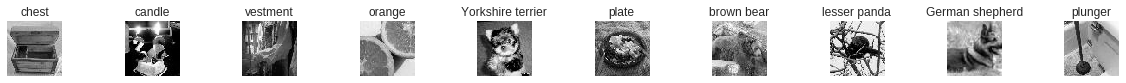

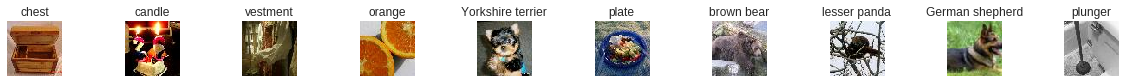

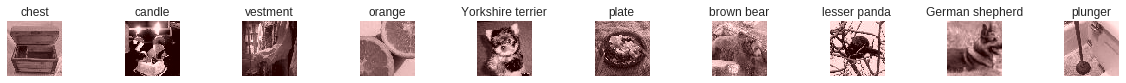

In [0]:
# Train the model within a session
train_iter = 0
losses = []
steps = []
flag_plot = True
display_out = True
with tf.train.MonitoredSession() as sess:
  for train_iter in range(int(TRAIN_ITERS)):
    _, train_loss_np, inputs, preds, lbls, ims = sess.run([training_op, train_display_loss, train_inputs, train_predictions, labels_train, images_train])
    
    if (train_iter % REPORT_TRAIN_EVERY) == 0:
      losses.append(train_loss_np)
      steps.append(train_iter)
      # print ('Train loss at iter {0:5d} out of {1:5d} is {2:.2f}'.format(int(train_iter), int(TRAIN_ITERS), train_loss_np))
    if ((train_iter+1) % PLOT_EVERY) == 0 and flag_plot:
      plot_losses(losses, steps)   
      if display_out:
          # convert predictions to RGB
          out_RGB = embedding2RGB(inputs, preds, rebalance=.38)
          # display illuminance inputs
          gallery(inputs, lbls)
          # display original colour images
          gallery(ims, lbls)
          # display predictions
          gallery(out_RGB, lbls) 
      
    if (train_iter % REPORT_VALID_EVERY) == 0:
      avg_loss = 0.0
      for test_iter in range(VALID_ITERS):
        loss, inputs, preds, lbls, ims = sess.run([valid_loss, valid_inputs, valid_predictions, labels_valid, images_valid])
        avg_loss += loss
      avg_loss /= (VALID_ITERS)
      print ('Test loss at iter {0:5d} out of {1:5d} is {2:.2f}'.format(int(train_iter), int(TRAIN_ITERS), avg_loss))
      if display_out:
        # convert predictions to RGB
        out_RGB = embedding2RGB(inputs, preds, rebalance=.38)
        # display illuminance inputs
        gallery(inputs, lbls)
        # display original colour images
        gallery(ims, lbls)
        # display predictions
        gallery(out_RGB, lbls)        